In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### Question 2

In [7]:
xs = np.arange(1.920, 2.080,0.001)
y1 = np.zeros_like(xs)
y2 = np.zeros_like(xs)
for i,x in enumerate(xs):
    y1[i] = x**9-18*x**8 +144*x**7 -672*x**6 +2016*x**5 -4032*x**4 +5376*x**3 -4608*x**2 +2304*x-512
    y2[i] = (x-2)**9

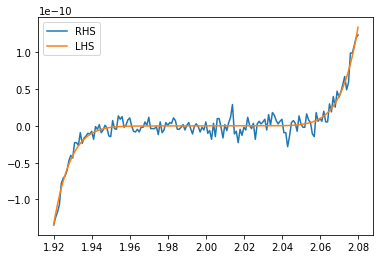

In [10]:
fig, ax1 = plt.subplots(1)
ax1.plot(xs,y1,label='RHS')
ax1.plot(xs,y2,label='LHS')
ax1.legend()


In [ ]:
### Question 3: Contioning of a matrix